<a href="https://colab.research.google.com/github/CobaMasa/PythonKerasDeeplearning/blob/main/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter5: Deep Learning for Computer Vision
Contents:
- Overview of CNN
- How to handle overfitting problems
    - Data augmentation
    - Feature engineering with pre-trained model
    - Fine-tuning pre-trained model
- Visualization of what CNN learned from data & how it decided to the conclusion.

## - Overview of CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
print('tf version: ', tf.__version__)
print('keras version: ', keras.__version__)

tf version:  2.3.0
keras version:  2.4.0


In [2]:
# List 5-1 & 5-2 (revised with functinal API)
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)              

In [3]:
# List 5-3
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

hist = model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1731 - accuracy: 0.9460
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0329 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0195 - accuracy: 0.9942


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.9926
test_loss: 0.026177480816841125
test_acc: 0.9926000237464905


In [5]:
# List 5-4
import os
basePath = 'drive/My Drive/Study/PythonKeras/data/cats_and_dogs_small'
for kind in ['train', 'validation', 'test']:
    path = os.path.join(basePath, kind)
    print('dogs in {}: {}'.format(kind, len(os.listdir(os.path.join(path, 'dogs')))))
    print('cats in {}: {}'.format(kind, len(os.listdir(os.path.join(path, 'cats')))))

dogs in train: 1000
cats in train: 1000
dogs in validation: 500
cats in validation: 500
dogs in test: 500
cats in test: 500


In [6]:
# List 5-5, 5-6 (Make a model ahead of preprocessing data)
from tensorflow.keras import optimizers

inputs = Input(shape=(150, 150, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=prediction)
display(model.summary())
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)      

None

In [7]:
# List 5-7: Useful keras library generating tensor data from images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(basePath, 'train'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    directory=os.path.join(basePath, 'validation'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

'''
for data_batch, labels_batch in train_generator:
    print('data_batch_shape: ', data_batch.shape)
    print('labels_batch_shape: ', labels_batch.shape)
    break
'''

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


"\nfor data_batch, labels_batch in train_generator:\n    print('data_batch_shape: ', data_batch.shape)\n    print('labels_batch_shape: ', labels_batch.shape)\n    break\n"

In [8]:
# List 5-8
history = model.fit_generator(train_generator,
                               steps_per_epoch=100,
                               epochs=30,
                               validation_data=validation_generator,
                               validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 1340s 13s/step - loss: 0.6893 - acc: 0.5295 - val_loss: 0.6868 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 11s 107ms/step - loss: 0.6636 - acc: 0.5975 - val_loss: 0.6976 - val_acc: 0.5430
Epoch 3/30
100/100 [==============================] - 11s 106ms/step - loss: 0.6258 - acc: 0.6495 - val_loss: 0.6337 - val_acc: 0.6290
Epoch 4/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5747 - acc: 0.6995 - val_loss: 0.7493 - val_acc: 0.5900
Epoch 5/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5570 - acc: 0.7140 - val_loss: 0.5818 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5257 - acc: 0.7360 - val_loss: 0.5827 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5025 - acc: 0.7495 - val_loss: 0.55

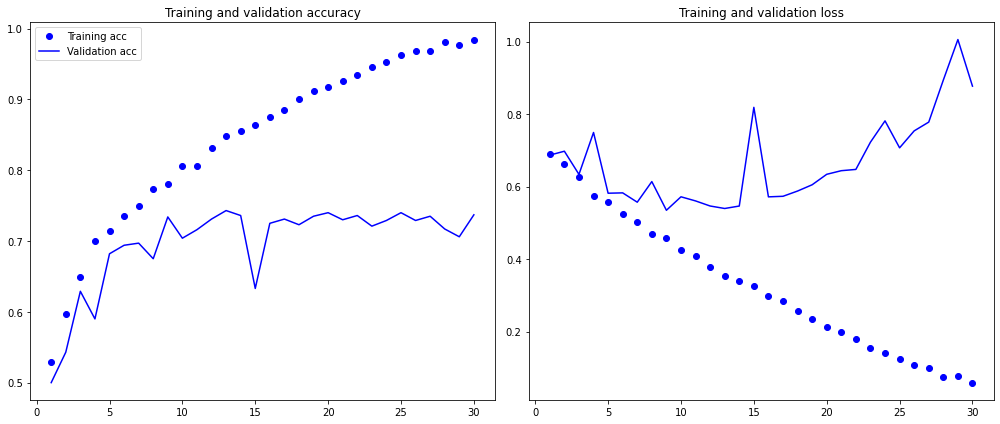

In [9]:
# List 5-10
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(acc)+1)

# plotacc
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'b', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# plot loss
ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].set_title('Training and validation loss')

plt.tight_layout()
plt.show();

## How to handle overfitting problems

### 1. Data Augmentattion
Data augmentation in data analysis are techniques used <u>to increase the amount of data by adding slightly modified copies of already existing data</u> or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.
It is closely related to oversampling in data analysis.

Super useful keras method [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) is a key.

In [10]:
# List 5-11 (Setting Data Augmentation with keras.preprocessing.image.ImageDataGenerator)
datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

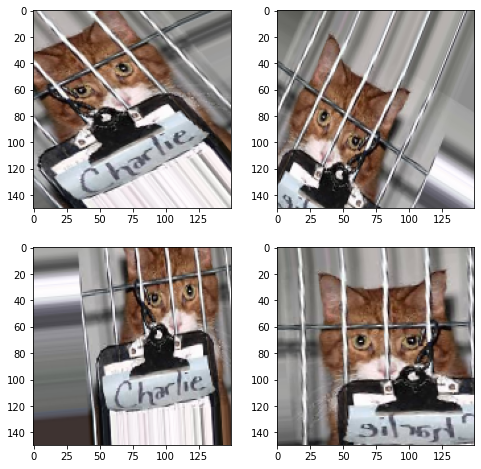

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
# List 5-12 (See how it works)
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(basePath, 'train/cats', fname) for fname in os.listdir(os.path.join(basePath, 'train/cats'))]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i = 0
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = ax[i//2, i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.tight_layout()
plt.show()

In [12]:
# List 5-12: Define CNN adding Dropout layers
from tensorflow.keras.layers import Dropout

inputs = Input(shape=(150, 150, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=prediction)
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
display(model.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)      

None

In [23]:
# List 5-13: Train CNN with data augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(basePath, 'train'),
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    directory=os.path.join(basePath, 'validation'),
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)

history = model.fit(train_generator, 
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 63/100 [=================>............] - 15s 242ms/step - loss: 0.6325 - acc: 0.6360


### 2. Using a pre-trained CNN